# 물속의 용존산소

In [1]:
import pandas as pd
o_df = pd.read_csv('../new/submission.csv')
o_df

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,-0.300187,-0.019581,-0.057254,0.837206,1.017229,-1.005408,0.364465,-0.563702,...,-0.581251,-0.436281,-0.537873,-0.010927,-1.038114,3.060003,1.927147,2.698174,1.213373,3.328376
1,1,9.10,3.059685,4.977315,-0.598872,0.837206,0.155118,0.612551,0.364465,2.685736,...,1.774977,2.242458,1.684483,-0.134824,1.420541,-1.070136,-0.310291,-0.618443,-0.475916,-0.968734
2,2,8.21,-2.410898,-0.580362,-0.598872,0.837206,-0.447743,0.612551,0.364465,-1.124555,...,-0.638987,0.008458,0.276426,0.055978,0.126512,0.215594,0.061553,-0.307130,-0.144092,-0.472508
3,3,8.39,0.368111,-0.160560,-0.088703,0.791966,-0.180262,-0.768633,0.075839,-0.213170,...,-0.035106,-0.319516,-0.564262,0.732460,-0.035242,-0.371005,0.114674,0.276011,-0.506082,1.744674
4,4,8.07,0.006116,-0.074406,-1.164950,0.837206,-0.966245,0.612551,0.364465,0.067257,...,-1.038453,-0.436281,-0.929942,-0.010927,0.139452,-0.155520,-1.330205,0.194007,-0.144092,-0.087140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,3445,8.08,-0.996332,-0.129231,-1.280262,0.837206,0.021377,-0.882088,-0.125598,0.785849,...,0.920649,-0.811992,-0.598191,-0.290935,-0.423450,-0.706205,-0.841496,-0.020115,-0.119959,-0.826201
3446,3446,8.09,-0.784704,-0.390824,-0.878417,-0.321648,-2.058390,-1.005408,0.364465,3.362264,...,-0.638987,-0.436281,-0.537873,0.038633,-1.038114,-1.070136,0.061553,0.198563,-0.955554,-0.615041
3447,3447,9.95,0.182659,-0.108398,-0.598872,-1.316940,0.066643,0.938116,0.394530,0.312629,...,1.774977,-0.535876,-0.537873,0.022278,0.050811,0.215594,-0.416532,0.194007,1.741276,0.071230
3448,3448,9.52,1.092102,-0.390824,-0.057254,0.837206,-0.966245,-0.462800,-2.545851,-0.143063,...,1.774977,2.242458,1.684483,2.913060,0.417669,0.215594,-1.117723,-0.307130,1.741276,0.493550


In [2]:
pre_o_df = o_df.copy()

In [3]:
pre_o_df = pre_o_df.drop(labels = ['id'], axis =1)
target_column = pre_o_df.pop('target')
pre_o_df['target'] = target_column
pre_o_df

,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,...,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7,target
0,-0.300187,-0.019581,-0.057254,0.837206,1.017229,-1.005408,0.364465,-0.563702,-0.436939,-0.648931,...,-0.436281,-0.537873,-0.010927,-1.038114,3.060003,1.927147,2.698174,1.213373,3.328376,8.59
1,3.059685,4.977315,-0.598872,0.837206,0.155118,0.612551,0.364465,2.685736,1.393787,1.355342,...,2.242458,1.684483,-0.134824,1.420541,-1.070136,-0.310291,-0.618443,-0.475916,-0.968734,9.10
2,-2.410898,-0.580362,-0.598872,0.837206,-0.447743,0.612551,0.364465,-1.124555,-0.835404,-0.648931,...,0.008458,0.276426,0.055978,0.126512,0.215594,0.061553,-0.307130,-0.144092,-0.472508,8.21
3,0.368111,-0.160560,-0.088703,0.791966,-0.180262,-0.768633,0.075839,-0.213170,-0.281980,1.157926,...,-0.319516,-0.564262,0.732460,-0.035242,-0.371005,0.114674,0.276011,-0.506082,1.744674,8.39
4,0.006116,-0.074406,-1.164950,0.837206,-0.966245,0.612551,0.364465,0.067257,0.083279,-0.648931,...,-0.436281,-0.929942,-0.010927,0.139452,-0.155520,-1.330205,0.194007,-0.144092,-0.087140,8.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,-0.996332,-0.129231,-1.280262,0.837206,0.021377,-0.882088,-0.125598,0.785849,0.371060,4.888752,...,-0.811992,-0.598191,-0.290935,-0.423450,-0.706205,-0.841496,-0.020115,-0.119959,-0.826201,8.08
3446,-0.784704,-0.390824,-0.878417,-0.321648,-2.058390,-1.005408,0.364465,3.362264,3.990451,1.007355,...,-0.436281,-0.537873,0.038633,-1.038114,-1.070136,0.061553,0.198563,-0.955554,-0.615041,8.09
3447,0.182659,-0.108398,-0.598872,-1.316940,0.066643,0.938116,0.394530,0.312629,0.005800,1.355342,...,-0.535876,-0.537873,0.022278,0.050811,0.215594,-0.416532,0.194007,1.741276,0.071230,9.95
3448,1.092102,-0.390824,-0.057254,0.837206,-0.966245,-0.462800,-2.545851,-0.143063,-0.436939,0.204307,...,2.242458,1.684483,2.913060,0.417669,0.215594,-1.117723,-0.307130,1.741276,0.493550,9.52


<Axes: >

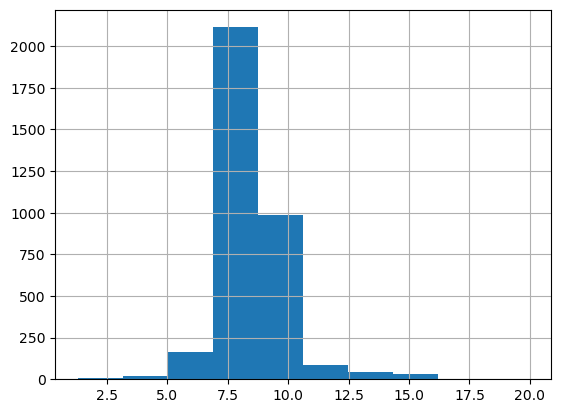

In [4]:
pre_o_df.target.hist()

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_o_df.iloc[:, :-1], pre_o_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [6]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))


In [7]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 1.8262, RMSE: 1.3514, MSLE: 0.0178, RMSLE: 0.1334, R2: 0.2346


In [8]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# poly_features = PolynomialFeatures(degree=5).fit_transform(features)

# X_train, X_test, y_train, y_test =\
# train_test_split(poly_features, targets, test_size=0.2, random_state=321)

# l_r = LinearRegression()
# l_r.fit(X_train, y_train)

In [9]:
# prediction = l_r.predict(X_test)
# get_evaluation(y_test, prediction)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


for i in range(12):
    pca = PCA(n_components=(i+1))

    pca_train = pca.fit_transform(features)

    print(pca.explained_variance_ratio_.sum(), i)

0.10122330095141542 0
0.16451067702400152 1
0.22393415749295228 2
0.2803164313909266 3
0.3267654388464567 4
0.3698423719571246 5
0.4124149056103285 6
0.45316900210868866 7
0.4892121119979487 8
0.5226913101834185 9
0.553920862336181 10
0.583773039423702 11


In [12]:
# 파이프라인 구축 후 차원 축소 후 선형 회귀 분석
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

features, targets = pre_o_df.iloc[:,:-1], pre_o_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

pipe = Pipeline(
    [
        ('pca', PCA(n_components=8)),
        ('l_r',LinearRegression())
    ]
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=8)), ('l_r', LinearRegression())])

In [13]:
prediction = pipe.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 2.2477, RMSE: 1.4992, MSLE: 0.0238, RMSLE: 0.1542, R2: 0.0580


In [ ]:
# 이상치 제거


In [14]:
# 이상치 제거를 위한 표준화 작업
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_o_df)
std_pre_o_df = pd.DataFrame(result, columns = pre_o_df.columns)
std_pre_o_df



,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,...,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7,target
0,-0.300187,-0.019581,-0.057254,0.837206,1.017229,-1.005408,0.364465,-0.563702,-0.436939,-0.648931,...,-0.436281,-0.537873,-0.010927,-1.038114,3.060003,1.927147,2.698174,1.213373,3.328376,0.102274
1,3.059685,4.977315,-0.598872,0.837206,0.155118,0.612551,0.364465,2.685736,1.393787,1.355342,...,2.242458,1.684483,-0.134824,1.420541,-1.070136,-0.310291,-0.618443,-0.475916,-0.968734,0.442138
2,-2.410898,-0.580362,-0.598872,0.837206,-0.447743,0.612551,0.364465,-1.124555,-0.835404,-0.648931,...,0.008458,0.276426,0.055978,0.126512,0.215594,0.061553,-0.307130,-0.144092,-0.472508,-0.150958
3,0.368111,-0.160560,-0.088703,0.791966,-0.180262,-0.768633,0.075839,-0.213170,-0.281980,1.157926,...,-0.319516,-0.564262,0.732460,-0.035242,-0.371005,0.114674,0.276011,-0.506082,1.744674,-0.031006
4,0.006116,-0.074406,-1.164950,0.837206,-0.966245,0.612551,0.364465,0.067257,0.083279,-0.648931,...,-0.436281,-0.929942,-0.010927,0.139452,-0.155520,-1.330205,0.194007,-0.144092,-0.087140,-0.244254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,-0.996332,-0.129231,-1.280262,0.837206,0.021377,-0.882088,-0.125598,0.785849,0.371060,4.888752,...,-0.811992,-0.598191,-0.290935,-0.423450,-0.706205,-0.841496,-0.020115,-0.119959,-0.826201,-0.237590
3446,-0.784704,-0.390824,-0.878417,-0.321648,-2.058390,-1.005408,0.364465,3.362264,3.990451,1.007355,...,-0.436281,-0.537873,0.038633,-1.038114,-1.070136,0.061553,0.198563,-0.955554,-0.615041,-0.230926
3447,0.182659,-0.108398,-0.598872,-1.316940,0.066643,0.938116,0.394530,0.312629,0.005800,1.355342,...,-0.535876,-0.537873,0.022278,0.050811,0.215594,-0.416532,0.194007,1.741276,0.071230,1.008577
3448,1.092102,-0.390824,-0.057254,0.837206,-0.966245,-0.462800,-2.545851,-0.143063,-0.436939,0.204307,...,2.242458,1.684483,2.913060,0.417669,0.215594,-1.117723,-0.307130,1.741276,0.493550,0.722025


In [15]:
# 이상치 확인 및 제거
condition = True
error_count = []

for column in std_pre_o_df.columns:
    if std_pre_o_df[column].between(-1.96, 1.96) is True:
        error_count.append(std_pre_o_df[column].between(-1.96, 1.96).count())
    condition &= std_pre_o_df[column].between(-1.96, 1.96)

std_pre_o_df = std_pre_o_df[condition]
std_pre_o_df


,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,...,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7,target
4,0.006116,-0.074406,-1.164950,0.837206,-0.966245,0.612551,0.364465,0.067257,0.083279,-0.648931,...,-0.436281,-0.929942,-0.010927,0.139452,-0.155520,-1.330205,0.194007,-0.144092,-0.087140,-0.244254
7,-0.383725,-0.160560,-0.057254,0.732805,0.159233,-0.462800,0.364465,-0.143063,-0.215570,1.007355,...,-0.811992,1.920101,-0.060486,-0.507562,-0.155520,-1.117723,0.194007,-0.144092,-0.192720,-0.524141
8,-0.912795,-0.113567,-0.878417,-0.119805,-0.231701,0.612551,-0.910301,-0.353383,-0.436939,-0.648931,...,1.291162,1.920101,-0.655195,-0.164645,1.735964,0.061553,0.194007,1.198290,1.813302,-1.357141
9,-0.355879,-0.113567,-0.057254,-0.321648,-0.674073,0.351113,-0.910301,-0.703915,-0.436939,1.007355,...,0.006741,-0.077945,1.872319,1.258787,0.215594,1.049595,0.198563,1.741276,0.039556,0.628729
10,0.033962,-0.129231,-0.252935,-0.255527,1.492522,0.632283,0.692176,0.295103,0.005800,-0.648931,...,-0.779710,-0.929942,-0.159604,-0.358749,0.215594,-0.310291,-0.527327,0.429060,0.071230,-0.230926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,-0.411571,-0.129231,-0.057254,0.214279,-0.966245,-0.462800,0.364465,-0.353383,-0.337323,0.204307,...,-0.436281,-0.537873,-0.828652,-1.445733,-1.070136,-0.416532,-0.307130,-0.475916,-1.179894,-0.624101
3412,-0.862672,-0.149595,-0.057254,-0.857574,-0.180262,-0.462800,0.364465,-1.054448,-0.835404,1.007355,...,-0.436281,-0.537873,-0.010927,0.139452,-1.070136,0.061553,0.194007,1.050477,-0.615041,-0.950637
3425,-0.606491,-0.129231,1.672429,1.432294,0.976078,0.612551,0.364465,-0.767011,-0.602966,-0.648931,...,1.291162,1.684483,-0.679974,0.094161,-1.055770,-0.416532,-0.853825,-0.955554,-1.037361,-0.224262
3431,0.368111,-0.035246,-0.057254,0.732805,0.155118,-0.462800,-0.910301,-0.686389,-0.680446,1.355342,...,-0.811992,-0.537873,-0.060486,0.139452,-0.155520,-0.416532,-0.307130,-0.144092,-0.087140,-0.011014


In [16]:
# 이상치 제거한 데이터를 인덱스 번호에 맞게 가져오기
pre_o_df = pre_o_df.iloc[std_pre_o_df.index].reset_index(drop=True)
pre_o_df

,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,...,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7,target
0,0.006116,-0.074406,-1.164950,0.837206,-0.966245,0.612551,0.364465,0.067257,0.083279,-0.648931,...,-0.436281,-0.929942,-0.010927,0.139452,-0.155520,-1.330205,0.194007,-0.144092,-0.087140,8.07
1,-0.383725,-0.160560,-0.057254,0.732805,0.159233,-0.462800,0.364465,-0.143063,-0.215570,1.007355,...,-0.811992,1.920101,-0.060486,-0.507562,-0.155520,-1.117723,0.194007,-0.144092,-0.192720,7.65
2,-0.912795,-0.113567,-0.878417,-0.119805,-0.231701,0.612551,-0.910301,-0.353383,-0.436939,-0.648931,...,1.291162,1.920101,-0.655195,-0.164645,1.735964,0.061553,0.194007,1.198290,1.813302,6.40
3,-0.355879,-0.113567,-0.057254,-0.321648,-0.674073,0.351113,-0.910301,-0.703915,-0.436939,1.007355,...,0.006741,-0.077945,1.872319,1.258787,0.215594,1.049595,0.198563,1.741276,0.039556,9.38
4,0.033962,-0.129231,-0.252935,-0.255527,1.492522,0.632283,0.692176,0.295103,0.005800,-0.648931,...,-0.779710,-0.929942,-0.159604,-0.358749,0.215594,-0.310291,-0.527327,0.429060,0.071230,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,-0.411571,-0.129231,-0.057254,0.214279,-0.966245,-0.462800,0.364465,-0.353383,-0.337323,0.204307,...,-0.436281,-0.537873,-0.828652,-1.445733,-1.070136,-0.416532,-0.307130,-0.475916,-1.179894,7.50
963,-0.862672,-0.149595,-0.057254,-0.857574,-0.180262,-0.462800,0.364465,-1.054448,-0.835404,1.007355,...,-0.436281,-0.537873,-0.010927,0.139452,-1.070136,0.061553,0.194007,1.050477,-0.615041,7.01
964,-0.606491,-0.129231,1.672429,1.432294,0.976078,0.612551,0.364465,-0.767011,-0.602966,-0.648931,...,1.291162,1.684483,-0.679974,0.094161,-1.055770,-0.416532,-0.853825,-0.955554,-1.037361,8.10
965,0.368111,-0.035246,-0.057254,0.732805,0.155118,-0.462800,-0.910301,-0.686389,-0.680446,1.355342,...,-0.811992,-0.537873,-0.060486,0.139452,-0.155520,-0.416532,-0.307130,-0.144092,-0.087140,8.42


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_o_df.iloc[:, :-1], pre_o_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [18]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.6519, RMSE: 0.8074, MSLE: 0.0079, RMSLE: 0.0890, R2: 0.3256


In [20]:
pre_o_df.corr()['target'].sort_values(ascending=False)[1:]

O2_1      0.538958
O2_2      0.301549
NH4_2     0.085722
NH4_5     0.070398
NH4_7     0.064713
NH4_1     0.055774
NO3_2     0.050285
NH4_3     0.048469
NO2_2     0.044571
NO3_4     0.033051
O2_6      0.029990
NH4_4     0.028316
BOD5_2    0.025556
NO3_6     0.020429
NO3_1     0.018285
NO3_7     0.015285
O2_3      0.009713
BOD5_7    0.008569
BOD5_5    0.003265
NO2_5     0.002835
NO2_1     0.000621
BOD5_1   -0.001534
BOD5_6   -0.005254
NO2_4    -0.007526
O2_7     -0.009307
O2_5     -0.013087
NO3_3    -0.025856
NO3_5    -0.030843
NO2_3    -0.042036
NO2_7    -0.042989
O2_4     -0.043873
NH4_6    -0.045551
BOD5_4   -0.057388
BOD5_3   -0.060568
NO2_6    -0.062704
Name: target, dtype: float64

In [22]:
columns = ['O2_3', 'O2_4', 'O2_5', 'O2_6', 'O2_7', 'NH4_1',
       'NH4_2', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7', 'NO2_1', 'NO2_2',
       'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7', 'NO3_1', 'NO3_2', 'NO3_3',
       'NO3_4', 'NO3_5', 'NO3_6', 'NO3_7', 'BOD5_1', 'BOD5_2', 'BOD5_3',
       'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7',]
pre_o_df = pre_o_df.drop(labels= columns, axis = 1)
pre_o_df

,O2_1,O2_2,target
0,0.006116,-0.074406,8.07
1,-0.383725,-0.160560,7.65
2,-0.912795,-0.113567,6.40
3,-0.355879,-0.113567,9.38
4,0.033962,-0.129231,8.09
...,...,...,...
962,-0.411571,-0.129231,7.50
963,-0.862672,-0.149595,7.01
964,-0.606491,-0.129231,8.10
965,0.368111,-0.035246,8.42


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_o_df.iloc[:, :-1], pre_o_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [24]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.6372, RMSE: 0.7982, MSLE: 0.0077, RMSLE: 0.0877, R2: 0.3408


In [25]:
# OLS 수치 확인
from statsmodels.api import OLS

features, targets = pre_o_df.iloc[:, :-1], pre_o_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.521
Model:                            OLS   Adj. R-squared (uncentered):              0.520
Method:                 Least Squares   F-statistic:                              525.3
Date:                Sat, 11 May 2024   Prob (F-statistic):                   4.46e-155
Time:                        02:05:55   Log-Likelihood:                         -3070.8
No. Observations:                 967   AIC:                                      6146.
Df Residuals:                     965   BIC:                                      6155.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
pre_o_df.corr()['target'].sort_values(ascending=False)[1:]

O2_1    0.538958
O2_2    0.301549
Name: target, dtype: float64

array([[<Axes: title={'center': 'O2_1'}>,
        <Axes: title={'center': 'O2_2'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

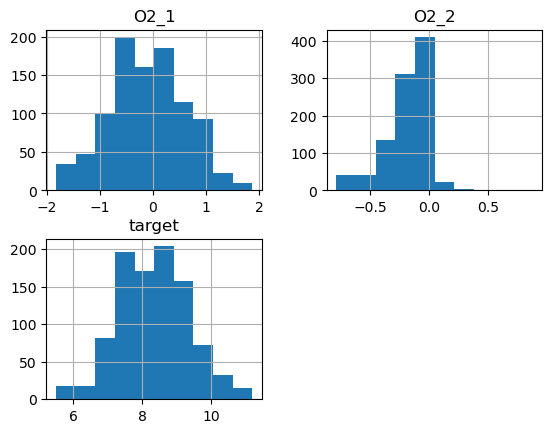

In [27]:
pre_o_df.hist()